In [19]:
# Provides access to system-specific parameters and functions
import sys
assert sys.version_info >= (3,10)

In [20]:
# Upgrades the ipykernel package to the latest version. Allows for execution of Python code within Jupyter Notebook
%pip install --upgrade ipykernel

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [21]:
# Installs gym with classic control environments
%pip install -q -U gym[classic_control,box2d,atari,accept-rom-license]==0.25.2

# Installs gym with environments requiring acceptance of ROM license
%pip install -q -U gym[accept-rom-license]==0.25.2

# Installs gym with pendulum environments
%pip install -q -U gym[Acrobot-v1]==0.25.2

# Installs gymnasium
%pip install -q -U gymnasium

# Library for game development
%pip install pygame

# Library for numerical computation
%pip install numpy

# Library for data visualization
%pip install matplotlib

# Library for machine learning and neural networks
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


ERROR: Cannot install gym[accept-rom-license,atari,box2d,classic-control]==0.25.2 because these package versions have conflicting dependencies.
ERROR: ResolutionImpossible: for help visit https://pip.pypa.io/en/latest/topics/dependency-resolution/#dealing-with-dependency-conflicts

[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [22]:
# Importing necessary libraries for environment setup, plotting, numerical operations, and deep learning
import gymnasium as gym
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from collections import deque

In [23]:
# Ensuring compatible TensorFlow version
from packaging import version
import tensorflow as tf

assert version.parse(tf.__version__) >= version.parse("2.8.0")

In [24]:
# Check if TensorFlow is configured to use a GPU for computation.
if not tf.config.list_physical_devices('GPU'):
    print("Get a GPU ......")

Get a GPU ......


In [25]:
# Lists environments in gym alphabetically
env = gym.make("Acrobot-v1", render_mode="rgb_array")
envs = gym.envs.registry
sorted(envs.keys())[:10] + ["..."]
envs['Acrobot-v1']

EnvSpec(id='Acrobot-v1', entry_point='gymnasium.envs.classic_control.acrobot:AcrobotEnv', reward_threshold=-100.0, nondeterministic=False, max_episode_steps=500, order_enforce=True, autoreset=False, disable_env_checker=False, apply_api_compatibility=False, kwargs={}, namespace=None, name='Acrobot', version=1, additional_wrappers=(), vector_entry_point=None)

In [26]:
# Resetting environment to start state
obs, info = env.reset(seed=42)
obs

array([ 0.99849933,  0.0547638 ,  0.99992526, -0.01222401,  0.07171959,
        0.0394736 ], dtype=float32)

In [27]:
# Rendering the environment state as an image
img = env.render()
img.shape  # height, width, channels (3 = Red, Green, Blue)

(500, 500, 3)

In [28]:

# Initializing the Pendulum environment with rendering options
input_shape = [6]  # Acrobot observation space shape
n_outputs = 3  # Acrobot action space

# Setting random seed for TensorFlow to ensure reproducibility
tf.random.set_seed(42)  # extra code – ensures reproducibility on the CPU

# Building a sequential neural network model with specified layers and activation functions
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation="elu", input_shape=input_shape),
    tf.keras.layers.Dense(32, activation="elu"),
    tf.keras.layers.Dense(n_outputs)
])

In [29]:
def epsilon_greedy_policy(state, epsilon=0):
    if np.random.rand() < epsilon:
        return np.random.randint(n_outputs)  # random action
    else:
        Q_values = model.predict(state[np.newaxis], verbose=0)[0]
        return Q_values.argmax()  # optimal action according to the DQN

In [30]:
# Initializing a replay buffer for storing experiences
replay_buffer = deque(maxlen=2000)

In [31]:
# extra code – A basic circular buffer implementation

class ReplayBuffer:
    def __init__(self, max_size):
        self.buffer = np.empty(max_size, dtype=object)
        self.max_size = max_size
        self.index = 0
        self.size = 0

    def append(self, obj):
        self.buffer[self.index] = obj
        self.size = min(self.size + 1, self.max_size)
        self.index = (self.index + 1) % self.max_size

    def sample(self, batch_size):
        indices = np.random.randint(self.size, size=batch_size)
        return self.buffer[indices]

In [32]:
# Function to randomly sample a batch of experiences from the replay buffer
def sample_experiences(batch_size):
    indices = np.random.randint(len(replay_buffer), size=batch_size)
    batch = [replay_buffer[index] for index in indices]
    return [
        np.array([experience[field_index] for experience in batch])
        for field_index in range(6)
    ]  # [states, actions, rewards, next_states, dones, truncateds]

In [33]:
# Defining a function to perform one step in the environment using the current policy
def play_one_step(env, state, epsilon):
    action = epsilon_greedy_policy(state, epsilon)
    next_state, reward, done, truncated, info = env.step(action)
    replay_buffer.append((state, action, reward, next_state, done, truncated))
    return next_state, reward, done, truncated, info

In [34]:
# Sets random seeds for numpy and TensorFlow for reproducibility
env.reset(seed=42)
np.random.seed(42)
tf.random.set_seed(42)

# Training parameters
rewards = [] 
best_score = 0

In [35]:
# Specifies training parameters like batch size, discount factor for future rewards, and sets up the optimizer and loss function
batch_size = 32
discount_factor = 0.95
optimizer = tf.keras.optimizers.Nadam(learning_rate=1e-2)
loss_fn = tf.keras.losses.mean_squared_error

# Function to train the model using experiences sampled from the replay buffer
def training_step(batch_size):
    experiences = sample_experiences(batch_size)
    states, actions, rewards, next_states, dones, truncateds = experiences
    next_Q_values = model.predict(next_states, verbose=0)
    max_next_Q_values = next_Q_values.max(axis=1)
    runs = 1.0 - (dones | truncateds)  # episode is not done or truncated
    target_Q_values = rewards + runs * discount_factor * max_next_Q_values
    target_Q_values = target_Q_values.reshape(-1, 1)
    mask = tf.one_hot(actions, n_outputs)
    with tf.GradientTape() as tape:
        all_Q_values = model(states)
        Q_values = tf.reduce_sum(all_Q_values * mask, axis=1, keepdims=True)
        loss = tf.reduce_mean(loss_fn(target_Q_values, Q_values))

    grads = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))

In [36]:
# Main training loop where the model is trained over a number of episodes, and rewards are plotted
rewards = []
for episode in range(250):
    acc_rewards = 0
    obs, info = env.reset()
    for step in range(500):
        epsilon = max(1 - episode / 250, 0.01)
        obs, reward, done, truncated, info = play_one_step(env, obs, epsilon)
        acc_rewards += reward # Store the total reward for plotting
        if done or truncated:
            break
    print(f"\rEpisode: {episode + 1}, Steps: {step + 1}, eps: {epsilon:.3f}, best: {best_score + 1}",
          end="")
    rewards.append(acc_rewards)
    if step <= best_score:
        best_weights = model.get_weights()
        best_score = step

    if episode > 50:
        training_step(batch_size)

Episode: 250, Steps: 232, eps: 0.010, best: 1

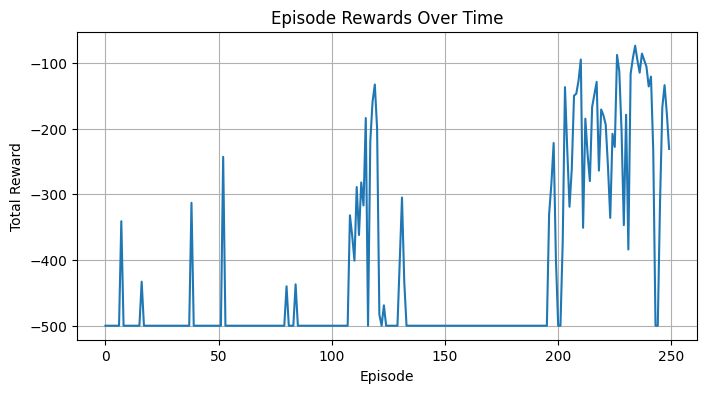

In [37]:
# Plots the total rewards obtained per episode over time
plt.figure(figsize=(8, 4))
plt.plot(rewards)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Episode Rewards Over Time')
plt.grid(True)
plt.show()

In [38]:
# Calculate the running average
def running_average(data, N):
    cumsum = np.cumsum(np.insert(data, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / float(N)

In [39]:
# Calculate the running average with a window size of N
N = 100 # You can adjust this window size as needed
rewards_running_avg = running_average(rewards, N)

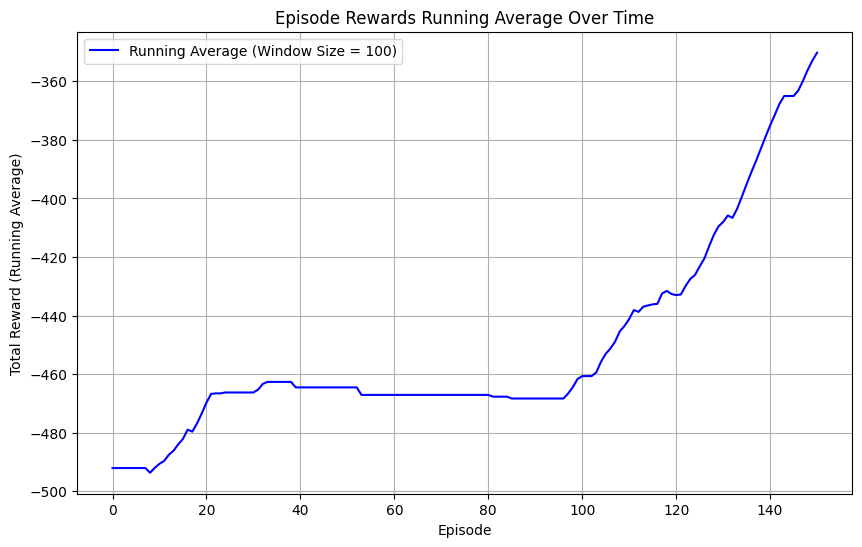

In [40]:
# Plot the Total Reward (Running Average)
plt.figure(figsize=(10, 6))
plt.plot(rewards_running_avg, color='blue', label='Running Average (Window Size = {})'.format(N))
plt.xlabel('Episode')
plt.ylabel('Total Reward (Running Average)')
plt.title('Episode Rewards Running Average Over Time')
plt.legend()
plt.grid(True)
plt.show()

In [41]:
# extra code – this cell displays an animation of one episode

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation

def update_scene(num, frames, patch):
    patch.set_data(frames[num])
    return patch,

def plot_animation(frames, repeat=False, interval=40):
    fig = plt.figure()
    patch = plt.imshow(frames[0])
    plt.axis('off')
    anim = matplotlib.animation.FuncAnimation(
        fig, update_scene, fargs=(frames, patch),
        frames=len(frames), repeat=repeat, interval=interval)
    plt.close()
    return anim

def show_one_episode(model, epsilon=0.01, n_max_steps=200, seed=42):
    frames = []
    env = gym.make("Acrobot-v1", render_mode="rgb_array")
    np.random.seed(seed)
    obs, info = env.reset(seed=seed)
    for step in range(n_max_steps):
        frames.append(env.render())
        action = np.argmax(model(np.array([obs])))  # Modified to include epsilon
        obs, reward, done, truncated, info = env.step(action)
        if done or truncated:
            break
    env.close()
    return plot_animation(frames)

animation = show_one_episode(model)

In [42]:
from IPython.display import HTML
animation = show_one_episode(model)
HTML(animation.to_jshtml())

c:\Users\newsy\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\animation.py:892: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(
